In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm   # for estimating and performing statistical model
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

In [25]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ['x%s' % x for i in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:np.abs(x[0]))
    return " + ".join("%s * %s" %(round(coefs, 3), names) for coefs, names in lst)

In [26]:
def load_data():
    boston = fetch_california_housing()
    print(boston.DESCR)
    x = boston["data"]
    y = boston["target"]
    names = boston["feature_names"]
    return x,y, names

In [27]:
def scale_data(x):
    scale = StandardScaler()
    x = scale.fit_transform(x)
    return x

In [44]:
def split_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [29]:
def root_mean_square_error(y_pred, y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred - y_test), abs(y_pred-y_test))/len(y_test))
    return rmse_train

In [47]:
def plot_real_vs_predicated(y_test, y_pred):
    plt.plot(y_test, y_pred, 'ro')  # Red circles for data points
    plt.plot([0, 50], [0, 50], 'g-')  # Green line for reference
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Real vs Predicted Values')
    plt.show()


In [50]:
def generate_regression_values(model, x, y):
    # Get the model parameters
    params = np.append(model.intercept_, model.coef_)  # Use `intercept_` and `coef_` correctly
    predictions = model.predict(x)  # Correct typo in `predications` to `predictions`
    
    # Create a new DataFrame for regression values
    newX = pd.DataFrame({"Constant": np.ones(len(x))}).join(pd.DataFrame(x))
    summary_frame = pd.DataFrame({
        "Actual": y,
        "Predicted": predictions,
    })
    
    return params, summary_frame


In [32]:
np.set_printoptions(precision=2, linewidth=100, suppress=True, edgeitems=2)


In [34]:
x, y, names = load_data()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [16]:
x[0:5]

array([[   8.33,   41.  ,    6.98,    1.02,  322.  ,    2.56,   37.88, -122.23],
       [   8.3 ,   21.  ,    6.24,    0.97, 2401.  ,    2.11,   37.86, -122.22],
       [   7.26,   52.  ,    8.29,    1.07,  496.  ,    2.8 ,   37.85, -122.24],
       [   5.64,   52.  ,    5.82,    1.07,  558.  ,    2.55,   37.85, -122.25],
       [   3.85,   52.  ,    6.28,    1.08,  565.  ,    2.18,   37.85, -122.25]])

In [36]:
y[0:5]

array([4.53, 3.58, 3.52, 3.41, 3.42])

In [38]:
names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [40]:
x = scale_data(x)

In [45]:
x_train, x_test, y_train, y_test = split_data(x, y)

:inear model: -0.001 * Population + -0.035 * AveOccup + 0.122 * HouseAge + -0.302 * AveRooms + 0.369 * AveBedrms + 0.847 * MedInc + -0.869 * Longitude + -0.894 * Latitude
Root Mean Square Error: 0.7284008391515453


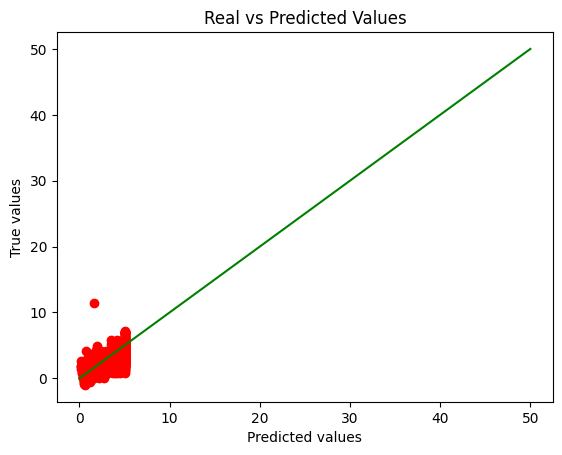

In [48]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

print(":inear model:", pretty_print_linear(linreg.coef_,names, sort=True))

Y_line_predict = linreg.predict(x_test)

print("Root Mean Square Error: {}".format(root_mean_square_error(Y_line_predict, y_test)))
plot_real_vs_predicated(y_test, Y_line_predict)

In [51]:
generate_regression_values(linreg, x_test, y_test)

(array([ 2.07,  0.85,  0.12, -0.3 ,  0.37, -0.  , -0.04, -0.89, -0.87]),
        Actual  Predicted
 0     0.47700   0.726049
 1     0.45800   1.767434
 2     5.00001   2.710922
 3     2.18600   2.835147
 4     2.78000   2.606958
 ...       ...        ...
 6187  2.37500   2.219941
 6188  0.67300   0.910516
 6189  2.18400   2.074655
 6190  1.19400   1.573714
 6191  2.09800   1.827441
 
 [6192 rows x 2 columns])

Lasso model:  0.0 * HouseAge + 0.0 * AveRooms + -0.0 * AveBedrms + -0.0 * Population + -0.0 * AveOccup + -0.0 * Latitude + -0.0 * Longitude + 0.496 * MedInc
Root Mean Square Error: 0.8824750601280763


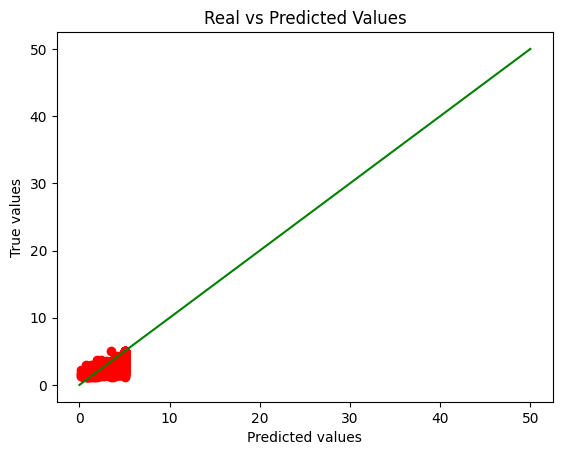

In [60]:
lasso = Lasso(alpha=.3)

lasso.fit(x_train, y_train)

print("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort=True))

y_lin_predict = lasso.predict(x_test)

print("Root Mean Square Error: {}".format(root_mean_square_error(y_lin_predict, y_test)))
plot_real_vs_predicated(y_test, y_lin_predict)

In [61]:
generate_regression_values(lasso, x_test, y_test)

(array([ 2.07,  0.5 ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  , -0.  ]),
        Actual  Predicted
 0     0.47700   1.495903
 1     0.45800   1.717880
 2     5.00001   1.965630
 3     2.18600   2.555106
 4     2.78000   2.029578
 ...       ...        ...
 6187  2.37500   1.828386
 6188  0.67300   1.445742
 6189  2.18400   1.973960
 6190  1.19400   2.009994
 6191  2.09800   1.853845
 
 [6192 rows x 2 columns])